In [1]:
!pip install psycopg2 sqlalchemy

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from sqlalchemy import create_engine 
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
style.use('seaborn')
import numpy as np

In [3]:
engine = create_engine('postgres://postgres:@localhost:5432/employee_db')

In [4]:
df1= pd.read_sql_table('salaries', engine)
df1.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [5]:
df2 = pd.read_sql_table('titles', engine)
df2.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,NaT
1,10002,Staff,1996-08-03,NaT
2,10003,Senior Engineer,1995-12-03,NaT
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,NaT


In [6]:
query = '''
SELECT titles.title, ROUND(AVG(salary)) AS "average_salary" FROM salaries
JOIN titles 
ON (salaries.emp_no = titles.emp_no)
GROUP BY titles.title
'''
df3 = pd.read_sql_query(query, engine)
df3 = df3.sort_values(by='average_salary', ascending=True)
df3

,title,average_salary
0,Assistant Engineer,48493.0
3,Senior Engineer,48507.0
1,Engineer,48540.0
6,Technique Leader,48581.0
2,Manager,51531.0
5,Staff,58465.0
4,Senior Staff,58503.0


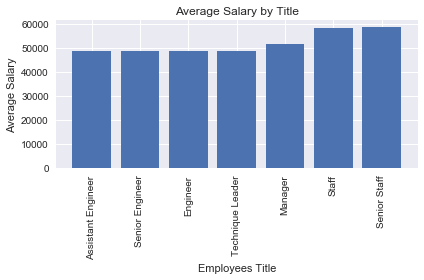

In [11]:
x = np.arange(len(df3.title))
tick =[x for x in x]
plt.xticks(tick, df3.title, rotation ="vertical")
y = df3.average_salary
plt.bar(x, y)
plt.xlabel("Employees Title")
plt.ylabel ("Average Salary")
plt.title("Average Salary by Title")
plt.tight_layout()
plt.show()